In [1]:
import torch
import numpy as np
import librosa
import matplotlib.pyplot as plt

from hybra.hybridfilterbank import HybrA

In [2]:
x, sr = librosa.load('hybra/ressources/test_signal.wav', sr=None)
x.resize(1, 1, x.shape[0])
x = torch.tensor(x[:,:,:5*sr], dtype=torch.float32)
x.shape

torch.Size([1, 1, 80000])

In [3]:
encoder = HybrA(n_filters=256, filter_length=512, hop_length=128, f_scale='erb', sr=16000, kernel_size=11, pretrained=True)

In [4]:
coeff = encoder(x)
x_tilde = encoder.decoder(coeff)
coeff.shape, x_tilde.shape

(torch.Size([1, 256, 622]), torch.Size([1, 1, 80000]))

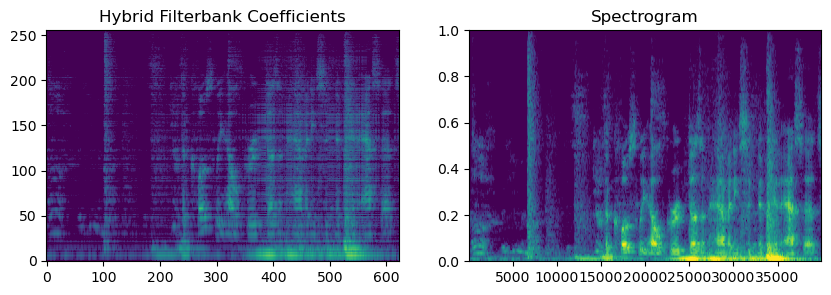

In [5]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(coeff[0, :,:].detach().numpy())**2), aspect='auto', cmap='viridis', origin='lower', vmin=-8, vmax=0)
plt.title('Hybrid Filterbank Coefficients')

plt.subplot(1, 2, 2)
plt.specgram(x[0, 0, :], NFFT=256, noverlap=128, cmap='viridis', scale='dB', vmin=-60, vmax=0)
plt.title('Spectrogram')

plt.show()